# Exploratory Data Analysis Starter

## Import packages

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [12]:
client_df = pd.read_csv("./Data/client_data (1).csv")
price_df = pd.read_csv('./Data/price_data (1).csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [11]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [13]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14606 non-null  object 
 1   channel_sales             14606 non-null  object 
 2   cons_12m                  14606 non-null  int64  
 3   cons_gas_12m              14606 non-null  int64  
 4   cons_last_month           14606 non-null  int64  
 5   date_activ                14606 non-null  object 
 6   date_end                  14606 non-null  object 
 7   date_modif_prod           14606 non-null  object 
 8   date_renewal              14606 non-null  object 
 9   forecast_cons_12m         14606 non-null  float64
 10  forecast_cons_year        14606 non-null  int64  
 11  forecast_discount_energy  14606 non-null  float64
 12  forecast_meter_rent_12m   14606 non-null  float64
 13  forecast_price_energy_p1  14606 non-null  float64
 14  foreca

In [14]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [18]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [8]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [19]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [ ]:
# for j in cat_cols: 
#     churn = df[[j, "churn"]]
#     churn.columns = [j, "churn"]
#     churn_total = churn.groupby("churn").count()
#     churn_percentage = churn_total / churn_total.sum() * 100
#     plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")


Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

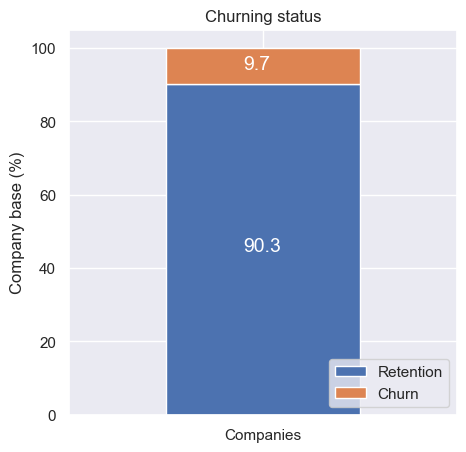

In [22]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [62]:
churn.groupby("churn").count()

Companies
churn           
0          13187
1           1419

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

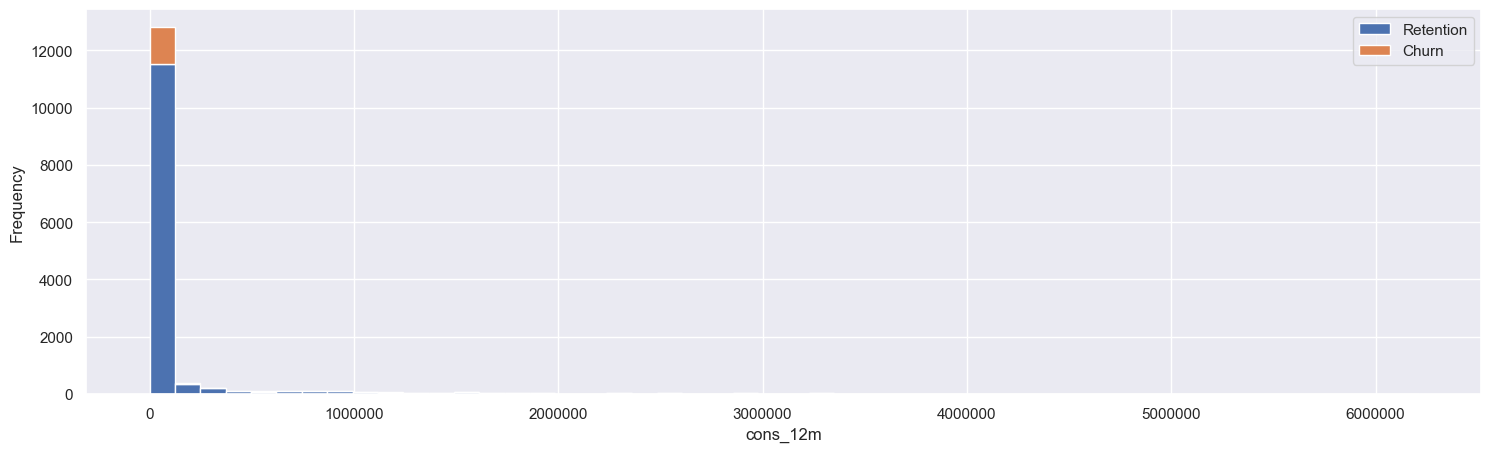

In [24]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

## Analysis of `numerical` columns 

In [33]:
client_df

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0             0         54946                0  2013-06-15  2016-06-15   
1          4660             0                0  2009-08-21  2016-08-30   
2           544             0                0  2010-04-16  2016-04-16   
3          1584             0                0  2010-03-30  2016-03-30   
4          4425             0              526  2010-01-13  2016-03-07   
...         ...           ...              ...         ...         ...   
14601     32270         47940                0  2012-05-24  2016-05-08   
14602      7223             0              181  2012-08-27  2016-08-27   
14603      1844             0              179  2012-02-08  2016-02-07   
14604       131             0                0  2012-08-30  2016-08-30   
14605      8730             0                0  2009-12-18  2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0          2015-11-01   2015-06-23               0.00  ...        t      0.00   
1          2009-08-21   2015-08-31             189.95  ...        f      0.00   
2          2010-04-16   2015-04-17              47.96  ...        f      0.00   
3          2010-03-30   2015-03-31             240.04  ...        f      0.00   
4          2010-01-13   2015-03-09             445.75  ...        f     52.32   
...               ...          ...                ...  ...      ...       ...   
14601      2015-05-08   2014-05-26            4648.01  ...        t      0.00   
14602      2012-08-27   2015-08-28             631.69  ...        f     15.94   
14603      2012-02-08   2015-02-09             190.39  ...        f     18.05   
14604      2012-08-30   2015-08-31              19.34  ...        f      0.00   
14605      2009-12-18   2015-12-21             762.41  ...        f      0.00   

       margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                     25.44               25.44            2      678.99   
1                     16.38               16.38            1       18.89   
2                     28.60               28.60            1        6.60   
3                     30.22               30.22            1       25.46   
4                     44.91               44.91            1       47.98   
...                     ...                 ...          ...         ...   
14601                 27.88               27.88            2      381.77   
14602                  0.00                0.00            1       90.34   
14603                 39.84               39.84            1       20.38   
14604                 13.08               13.08            1        0.96   
14605                 11.84               11.84            1       96.34   

      num_years_antig                         origin_up  pow_max  churn  
0                   3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1                   6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2                   6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3                   6  kamkkxfxxuwbdslkwi

In [34]:
price_df

id  price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
...                                  ...         ...                 ...   
192997  16f51cdc2baa19af0b940ee1b3dd17d5  2015-08-01            0.119916   
192998  16f51cdc2baa19af0b940ee1b3dd17d5  2015-09-01            0.119916   
192999  16f51cdc2baa19af0b940ee1b3dd17d5  2015-10-01            0.119916   
193000  16f51cdc2baa19af0b940ee1b3dd17d5  2015-11-01            0.119916   
193001  16f51cdc2baa19af0b940ee1b3dd17d5  2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.000000            0.000000           44.266931   
1             0.000000            0.000000           44.266931   
2             0.000000            0.000000           44.266931   
3             0.000000            0.000000           44.266931   
4             0.000000            0.000000           44.266931   
...                ...                 ...                 ...   
192997        0.102232            0.076257           40.728885   
192998        0.102232            0.076257           40.728885   
192999        0.102232            0.076257           40.728885   
193000        0.102232            0.076257           40.728885   
193001        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix  
0              0.00000            0.000000  
1              0.00000            0.000000  
2              0.00000            0.000000  
3              0.00000            0.000000  
4              0.00000            0.000000  
...                ...                 ...  
192997        24.43733           16.291555  
192998        24.43733           16.291555  
192999        24.43733           16.291555  
193000        24.43733           16.291555  
193001        24.43733           16.291555  

[193002 rows x 8 columns]

In [35]:
client_df[client_df["id"] == "038af19179925da21a25619c5a24b745"]

id                     channel_sales  \
11047  038af19179925da21a25619c5a24b745  foosdfpfkusacimwkcsosbicdxkicaua   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
11047      3576             0              630  2013-06-03  2016-06-03   

      date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
11047      2015-04-29   2015-06-14              531.5  ...        f     91.82   

       margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
11047                 21.52               21.52            1       52.53   

      num_years_antig                         origin_up  pow_max  churn  
11047               3  ldkssxwpmemidmecebumciepifcamkci     13.2      0  

[1 rows x 26 columns]

In [38]:
df = pd.merge(price_df, client_df, on="id")
df.columns.tolist()

['id',
 'price_date',
 'price_off_peak_var',
 'price_peak_var',
 'price_mid_peak_var',
 'price_off_peak_fix',
 'price_peak_fix',
 'price_mid_peak_fix',
 'channel_sales',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'origin_up',
 'pow_max',
 'churn']

In [45]:
numeric_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("object").columns.tolist()

### Analysis of the numerical variables

In [54]:
len(numeric_cols)

24

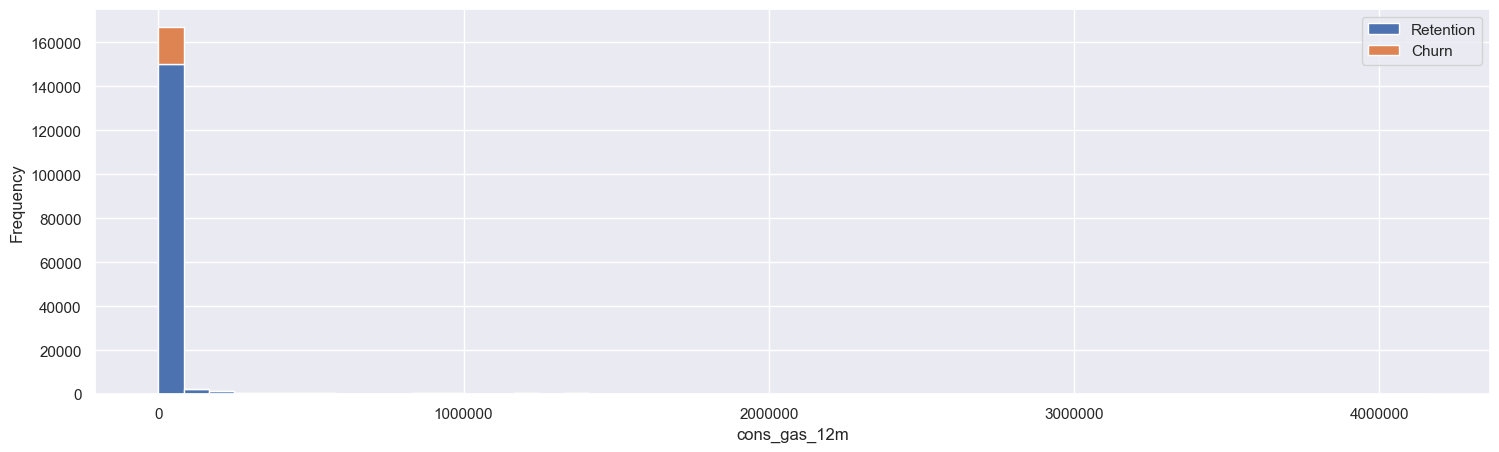

In [64]:
numeric_data = df[numeric_cols]
fig, ax = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(numeric_data, "cons_gas_12m", ax)

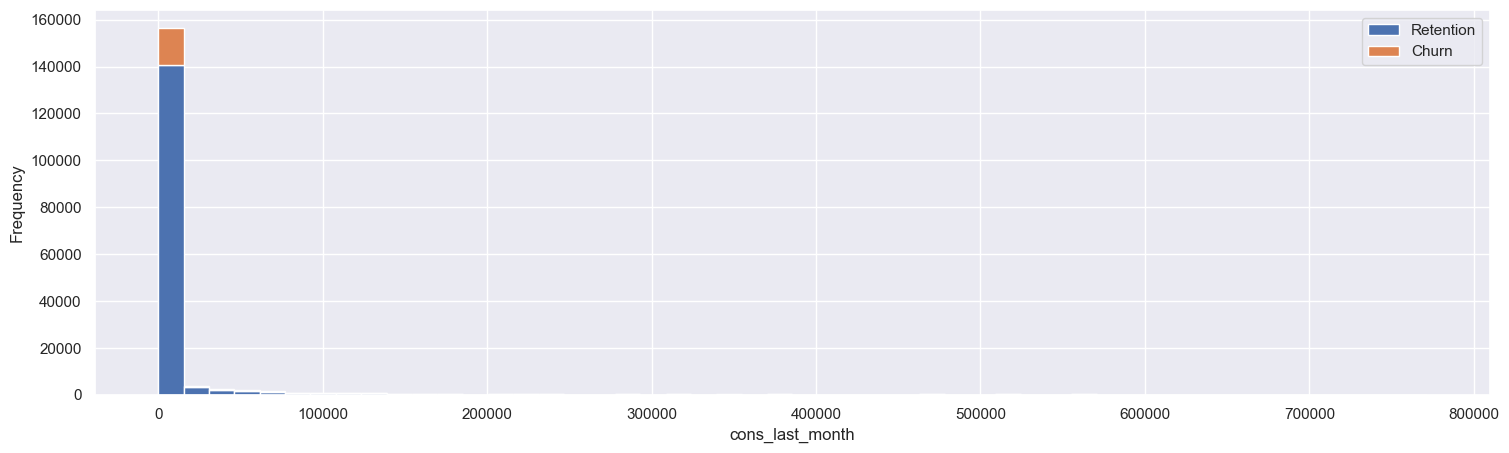

In [65]:
fig, ax = plt.subplots(nrows=1, figsize=(18, 5))
plot_distribution(numeric_data, "cons_last_month", ax)

C:\Users\Balogun Oladimeji\AppData\Local\Temp\ipykernel_13740\1448161667.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(nrows=1, figsize=(18, 5))


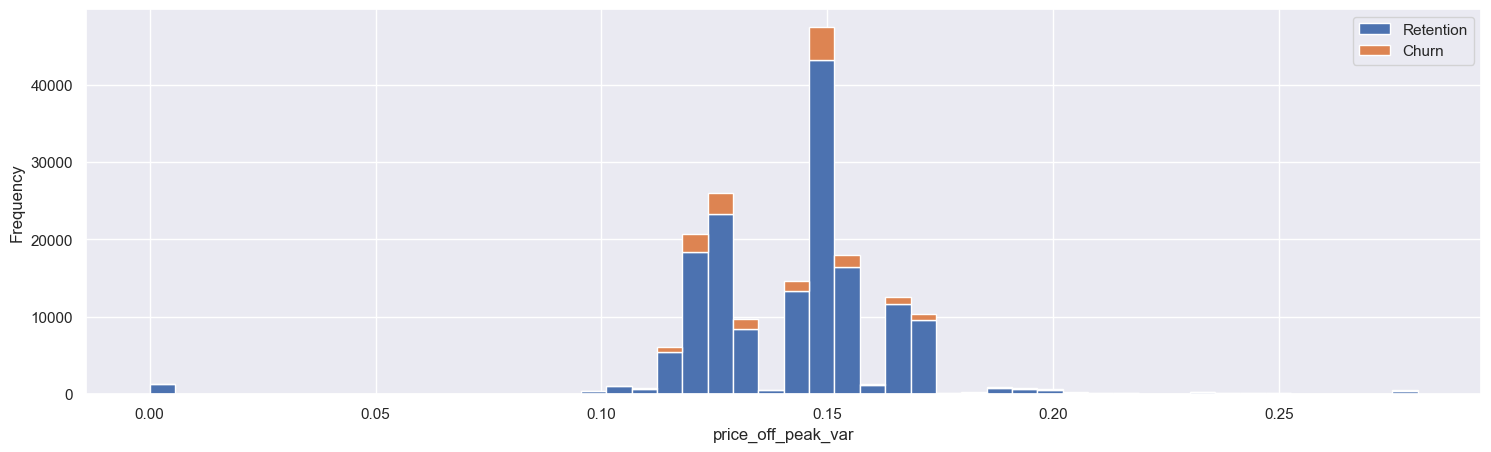

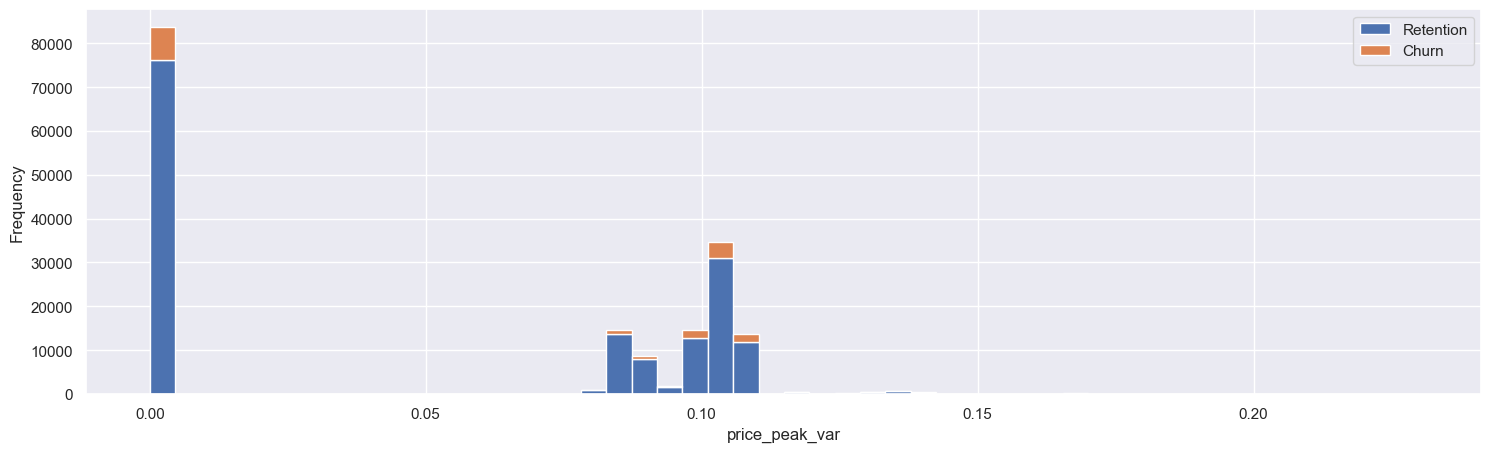

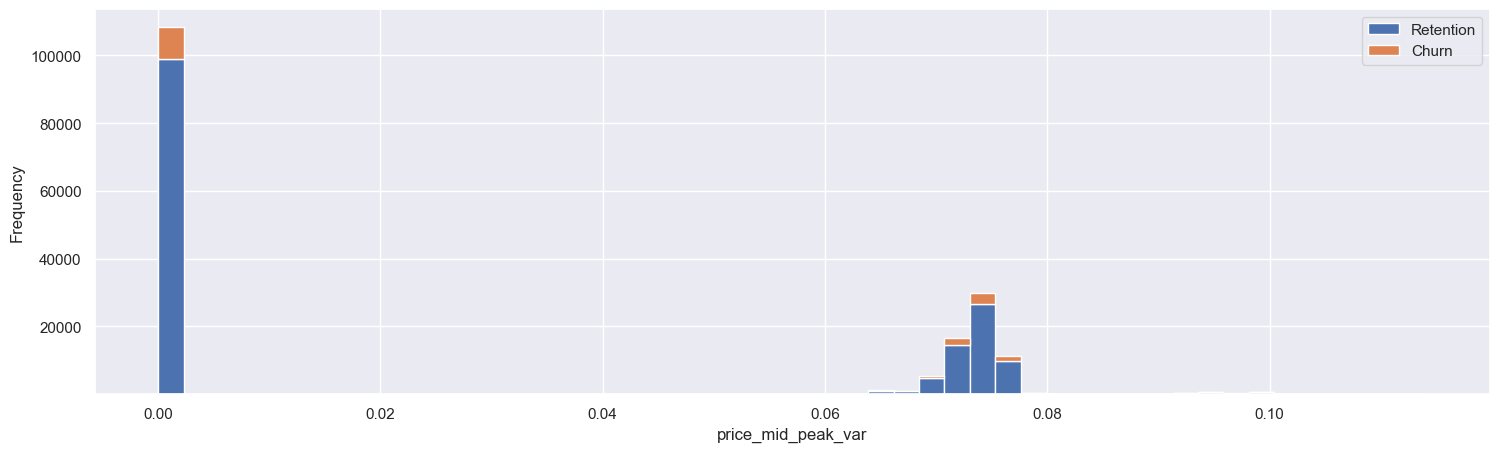

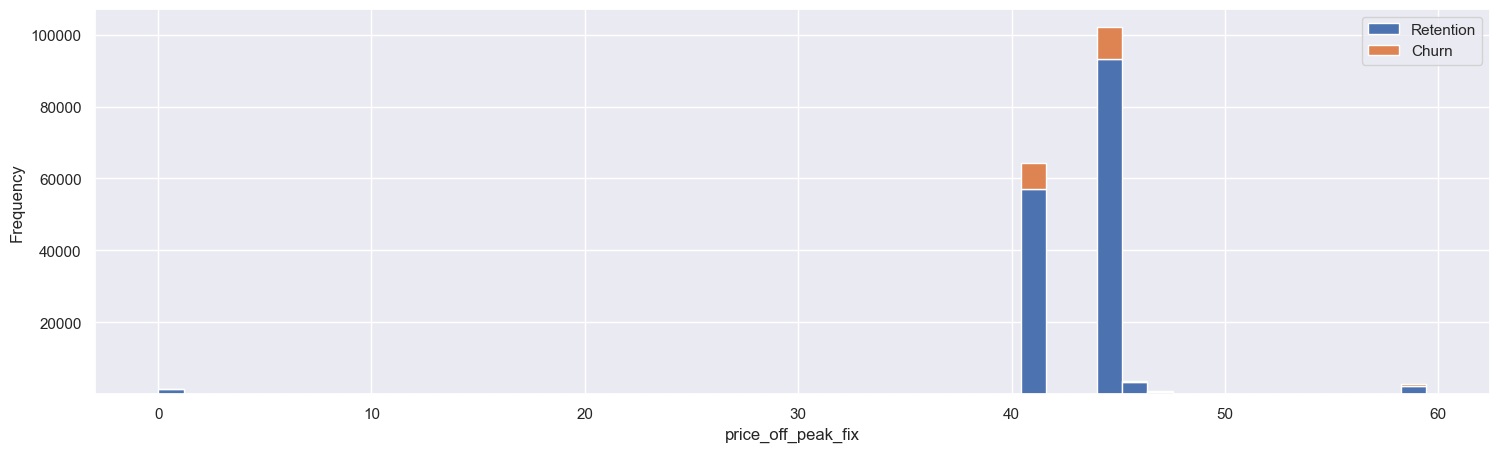

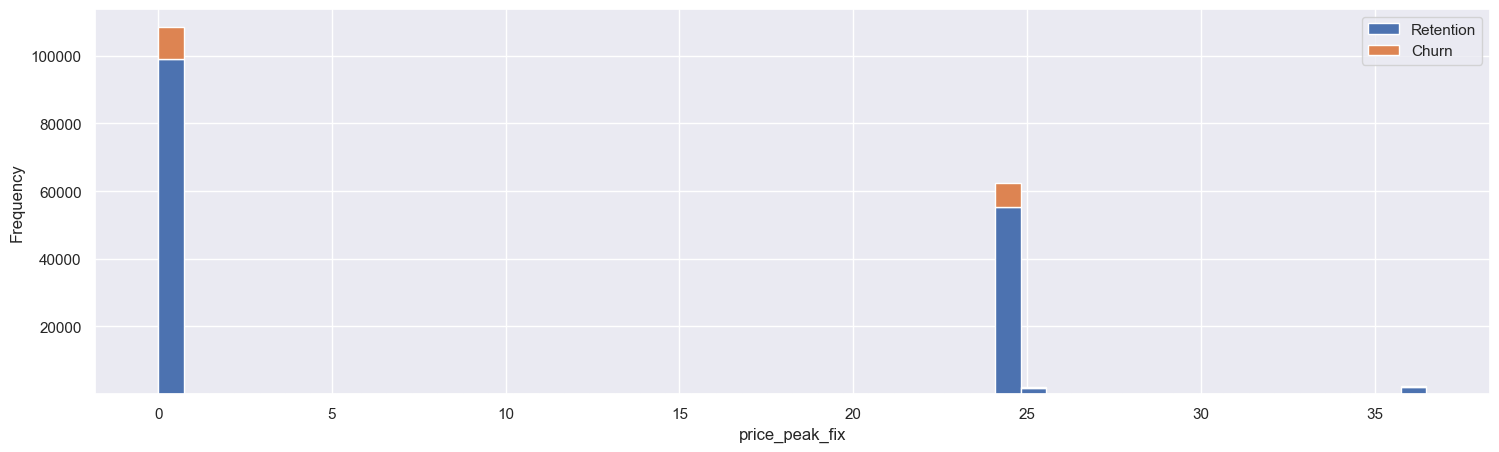

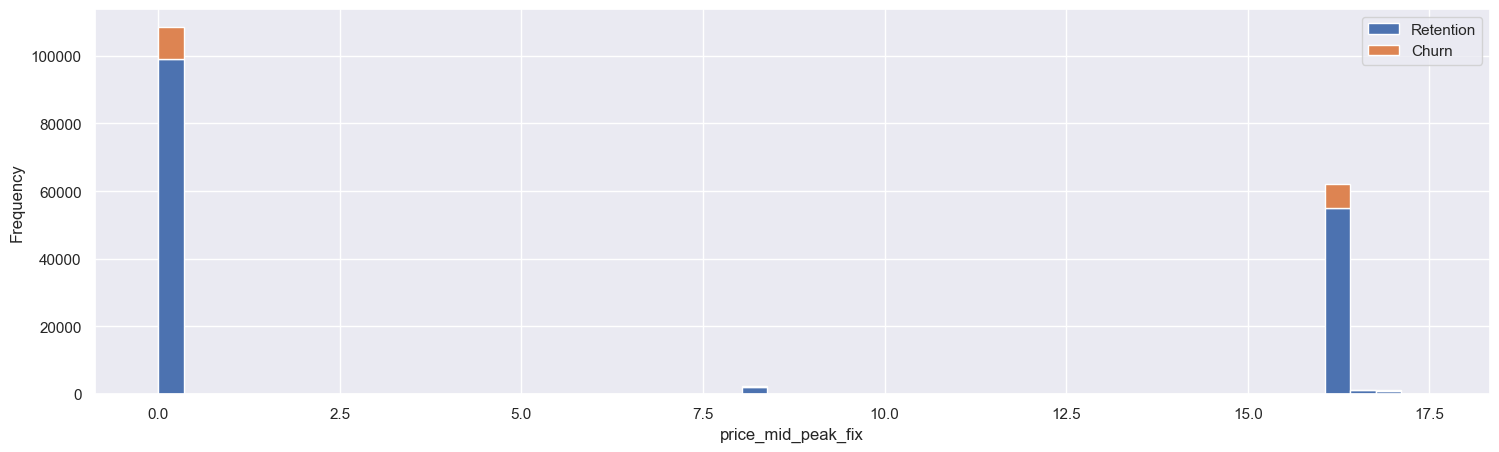

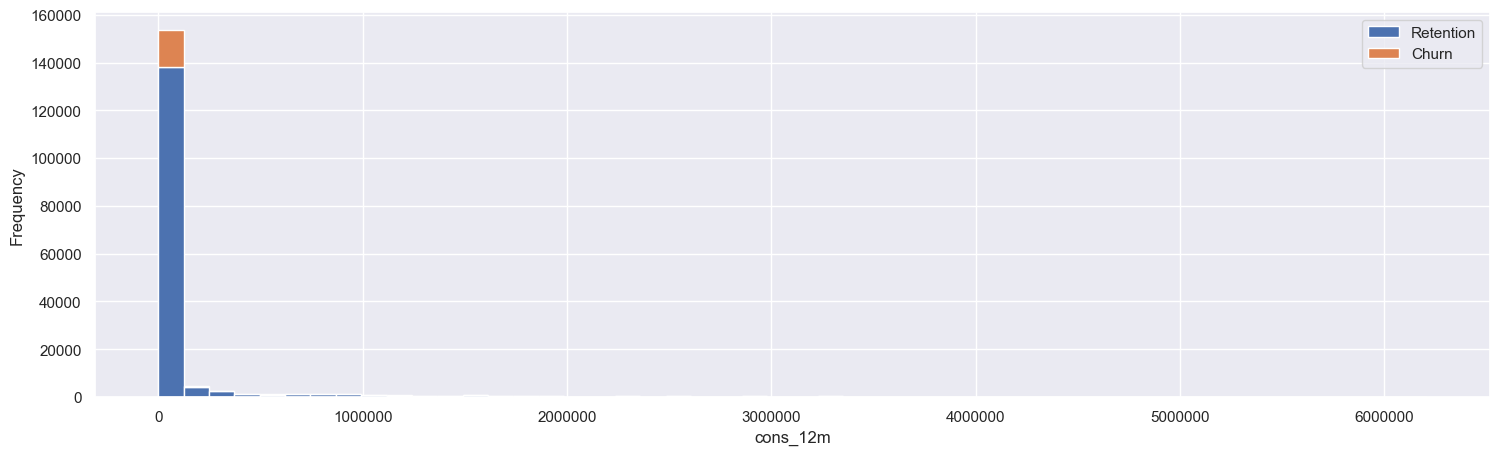

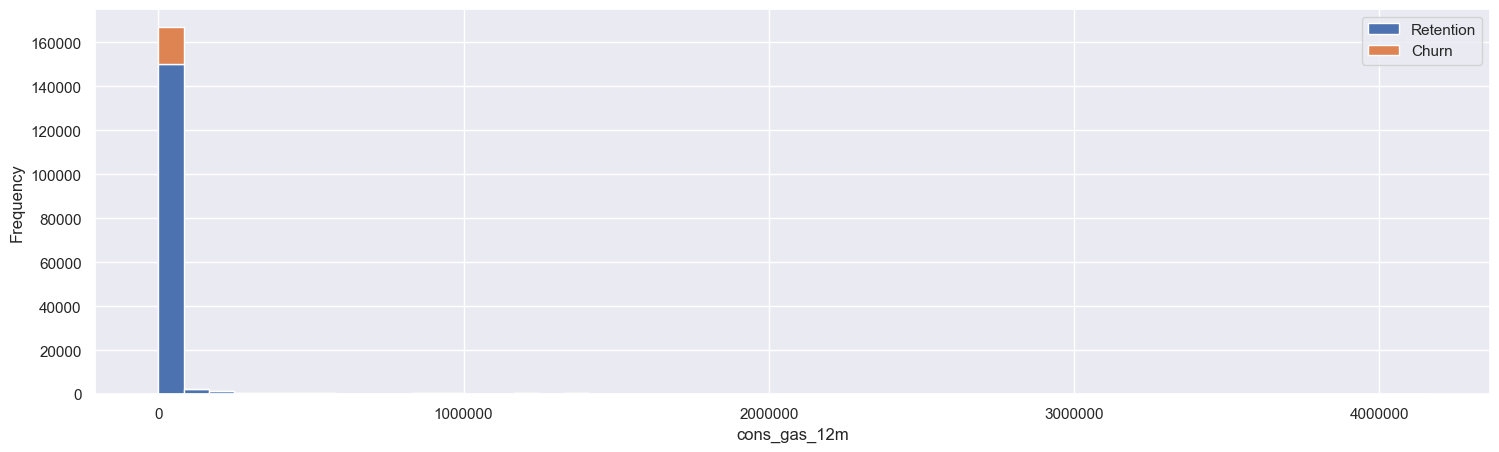

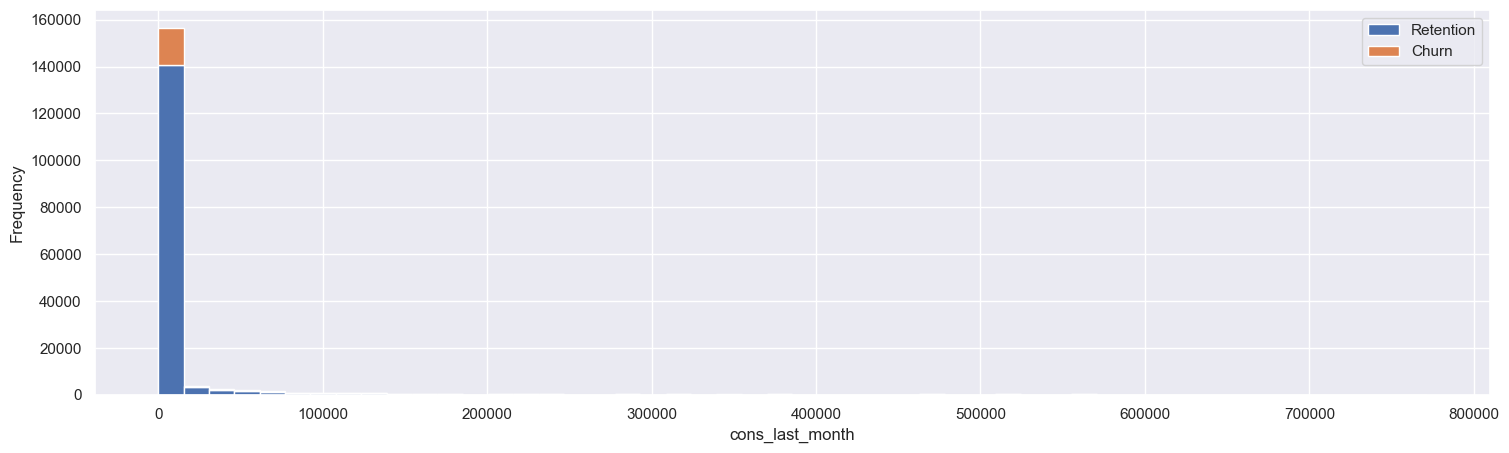

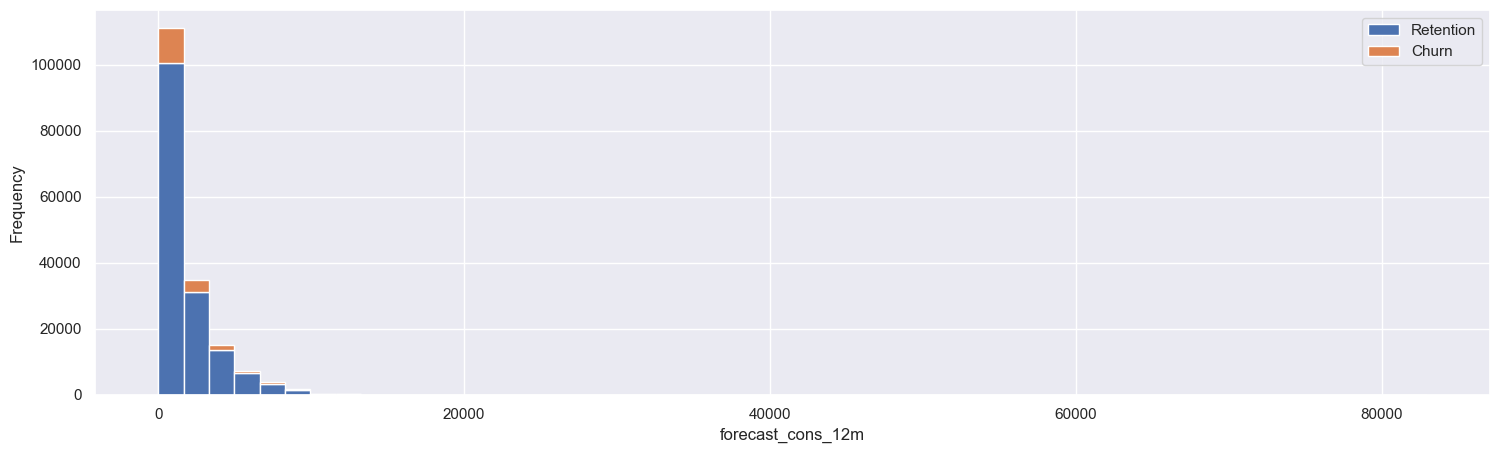

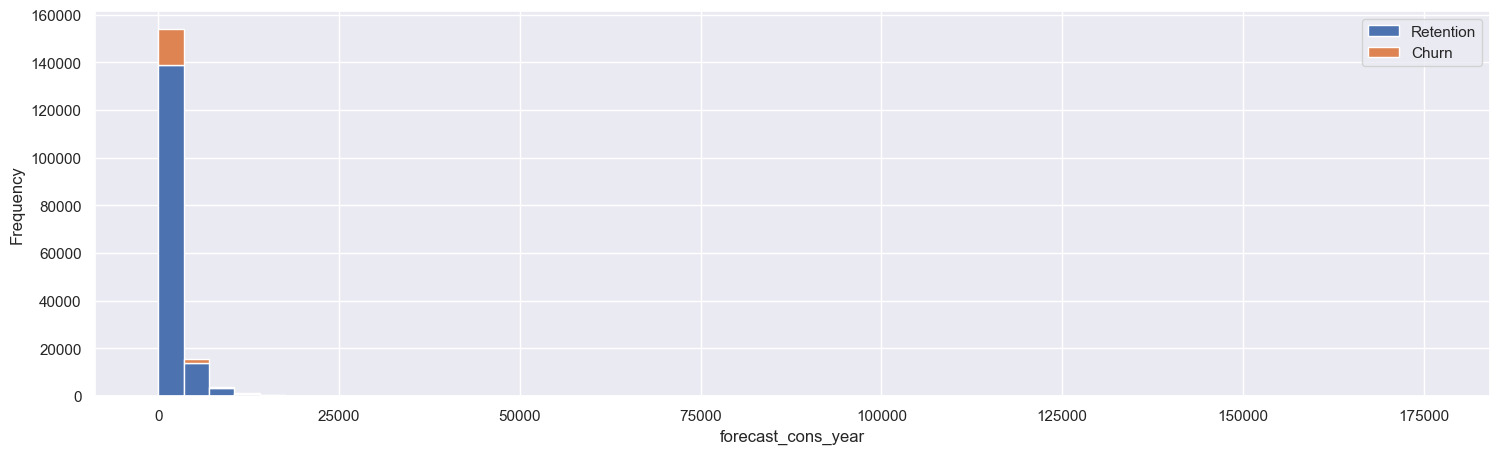

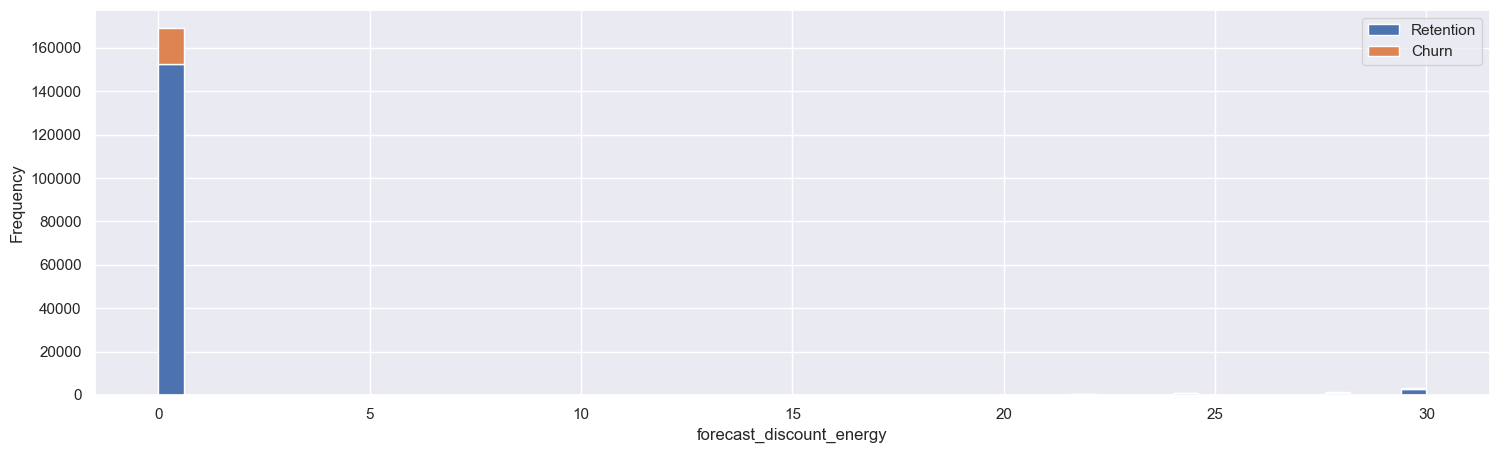

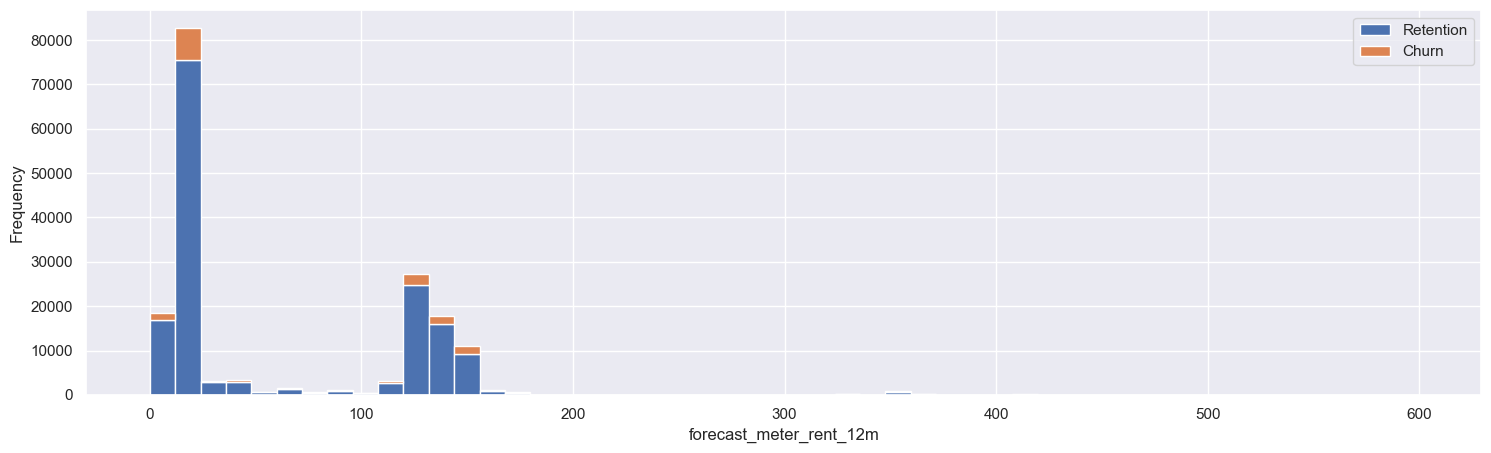

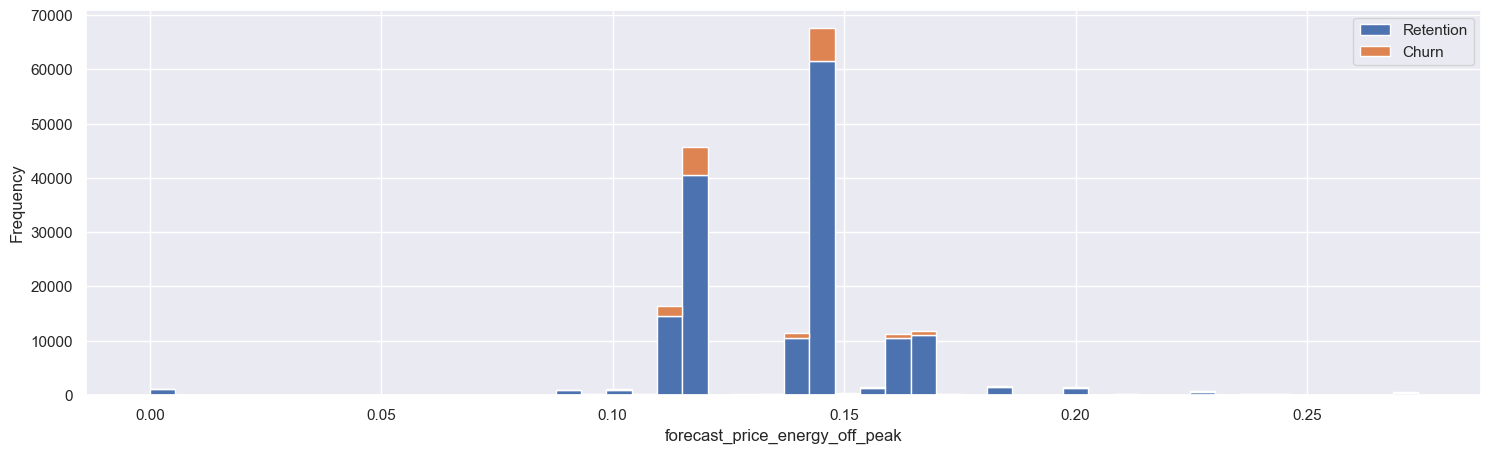

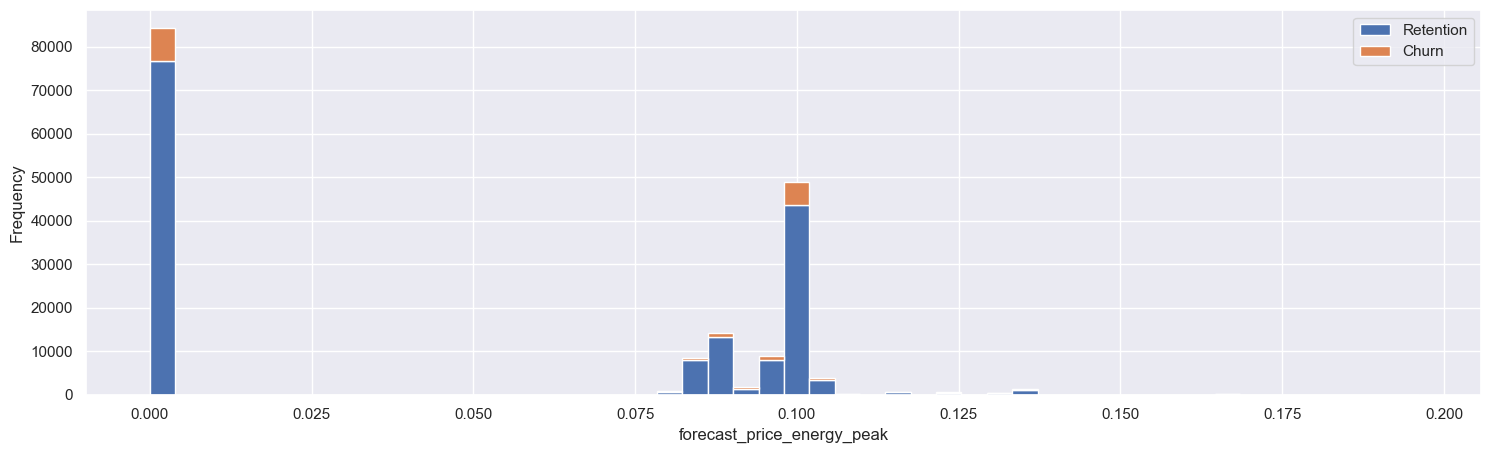

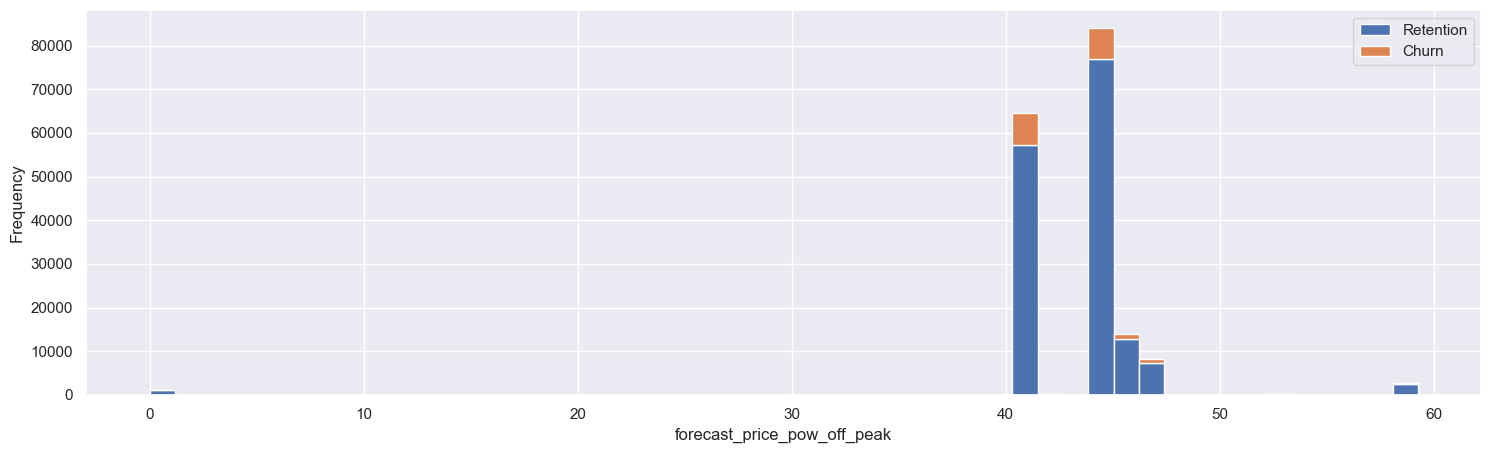

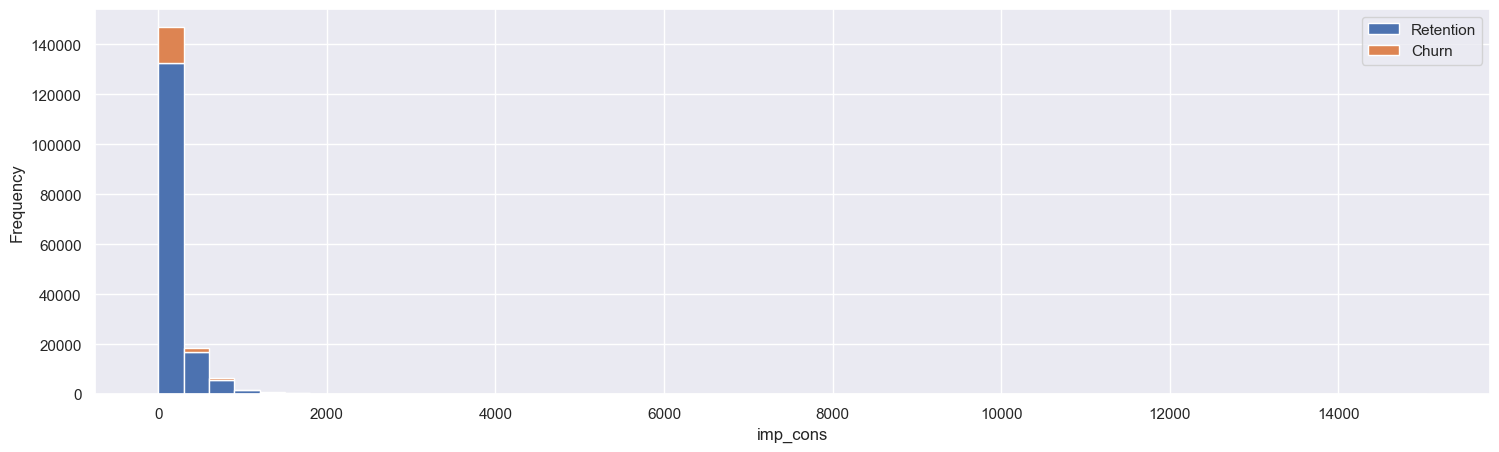

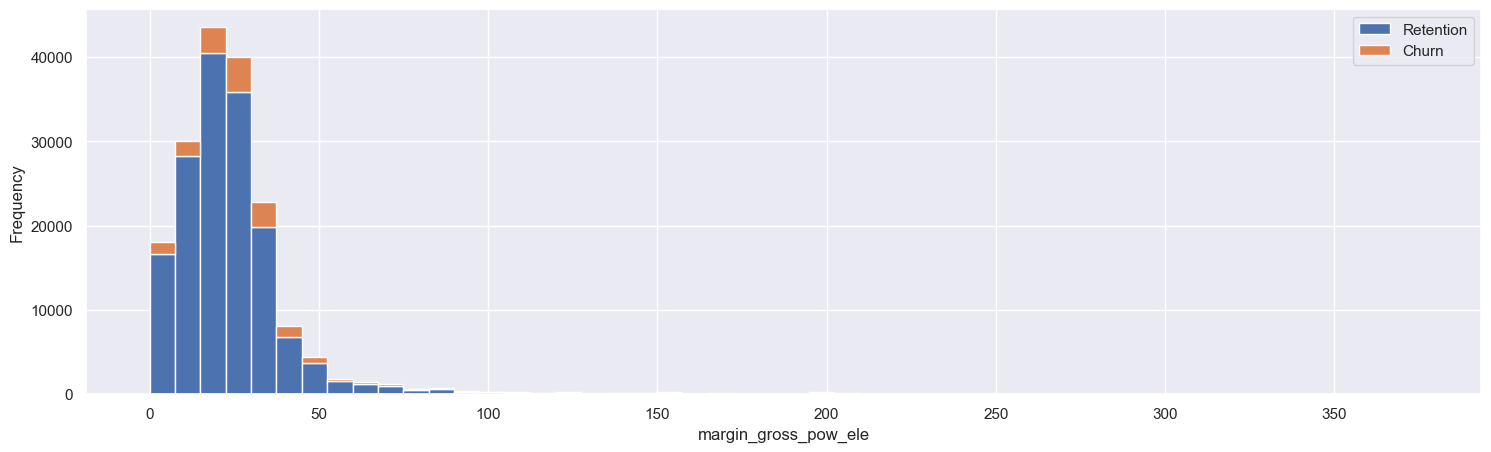

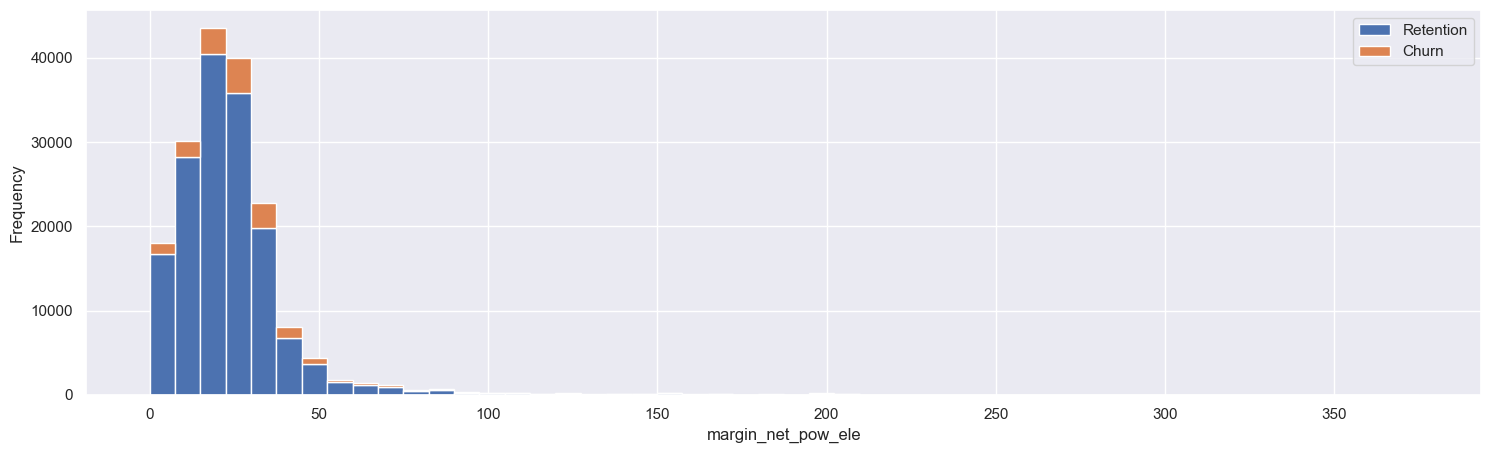

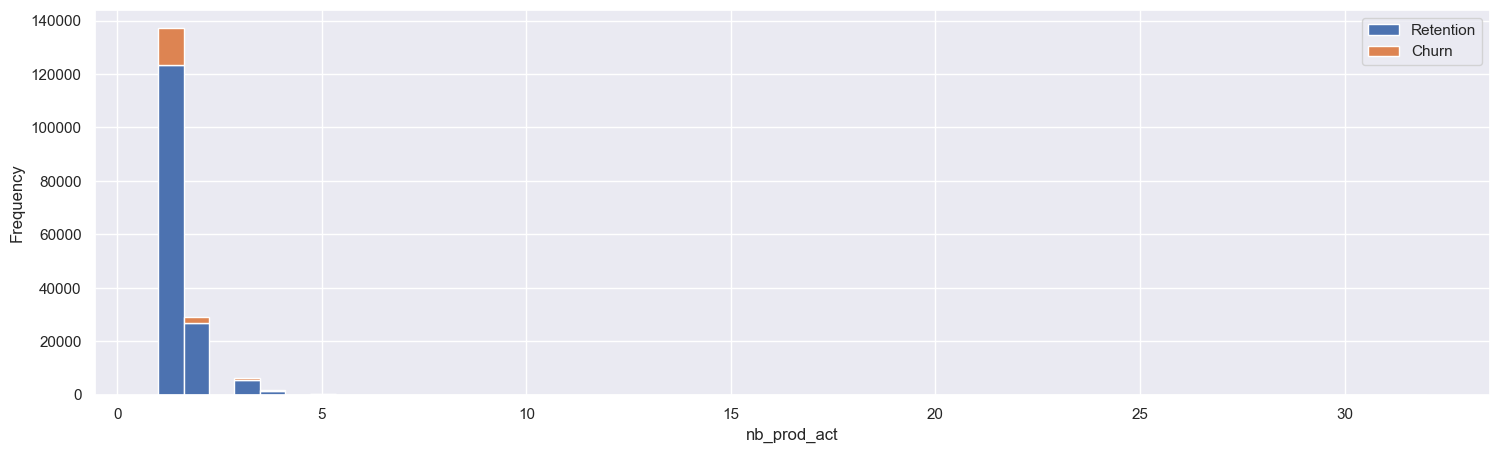

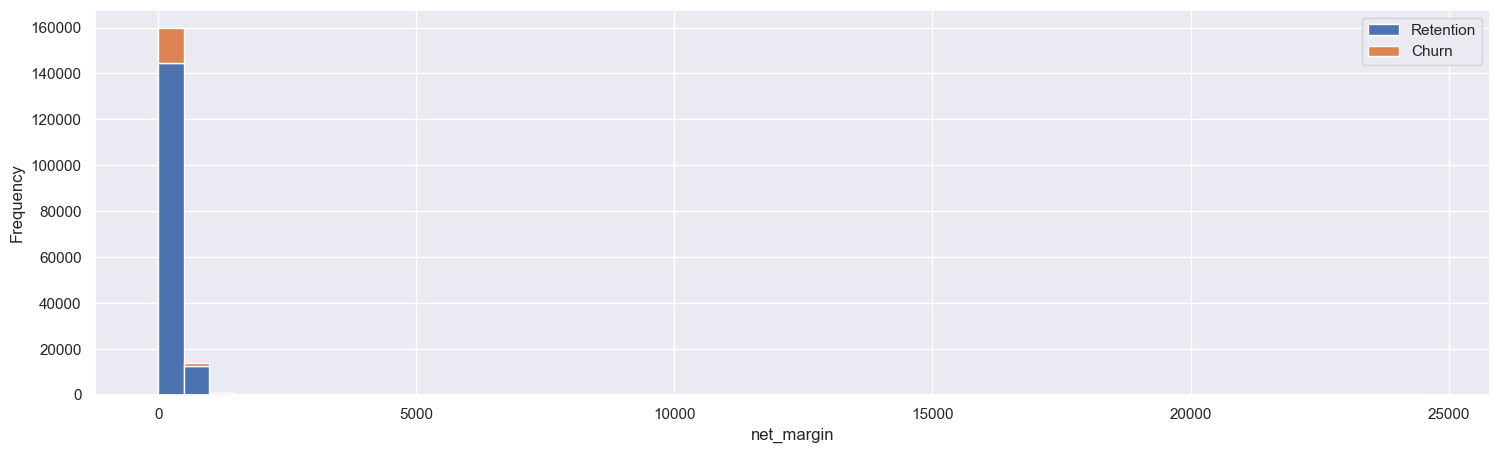

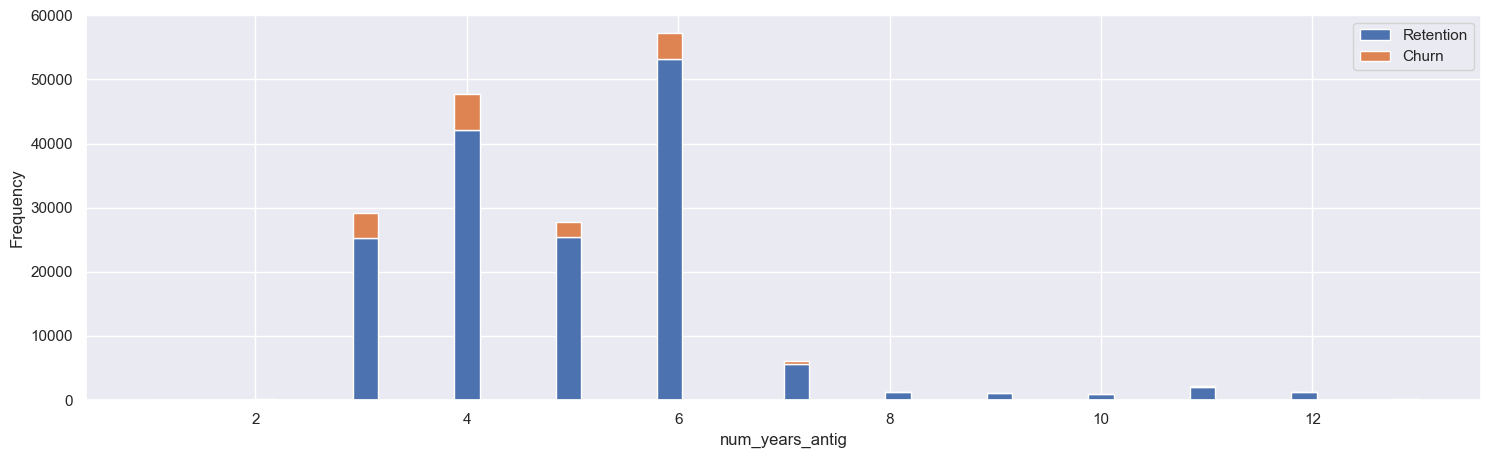

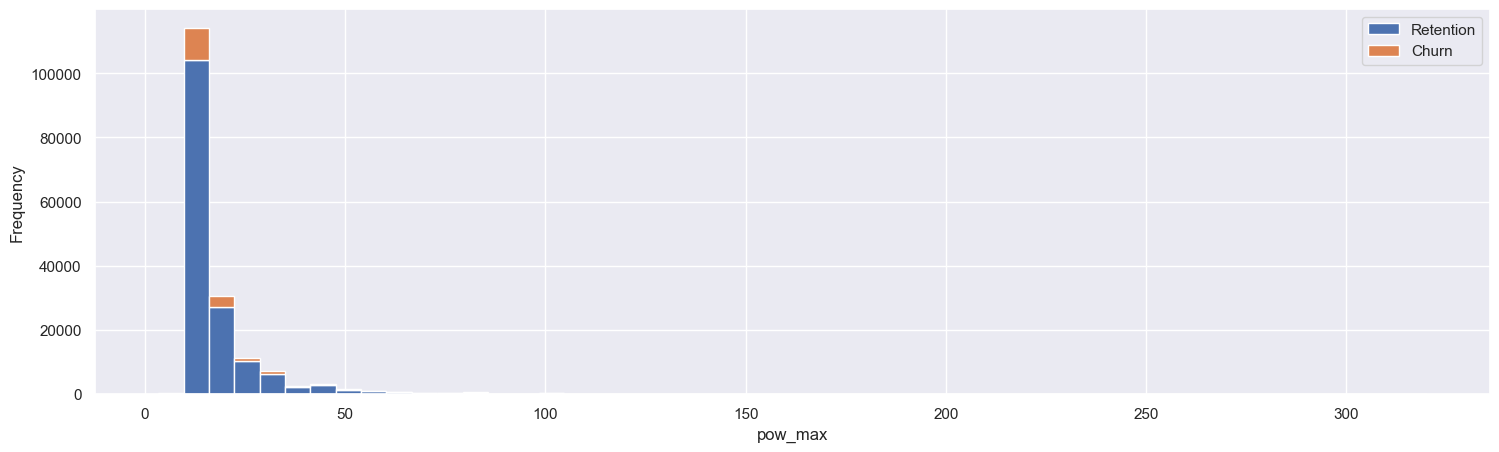

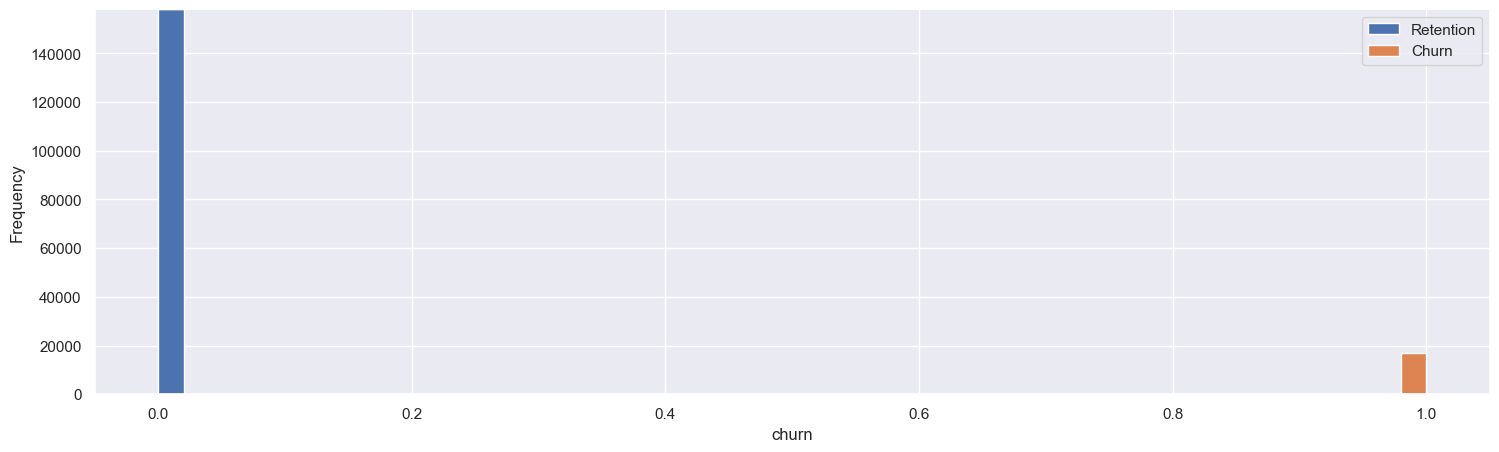

In [67]:
for i in numeric_cols: 
    fig, ax = plt.subplots(nrows=1, figsize=(18, 5))
    plot_distribution(numeric_data, i, ax)

### Analysis of the categorical columns 

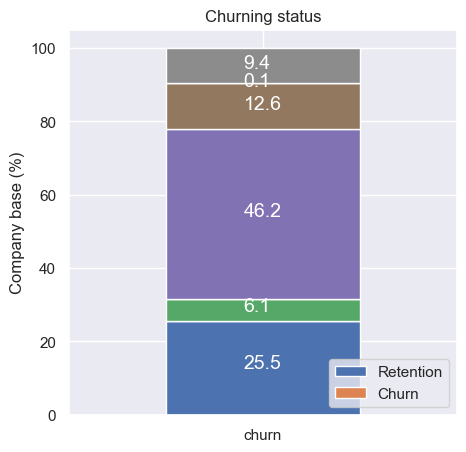

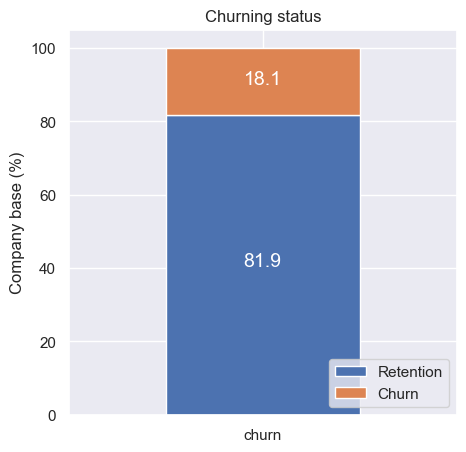

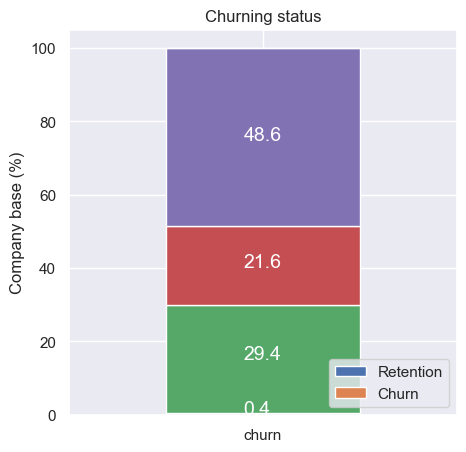

In [73]:
for j in cat_cols: 
    churn = df[[j, "churn"]]
    if churn[j].nunique() < 10: 
        churn.columns = [j, "churn"]
        churn_total = churn.groupby(j).count()
        churn_percentage = churn_total / churn_total.sum() * 100
        plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")
    
        
        

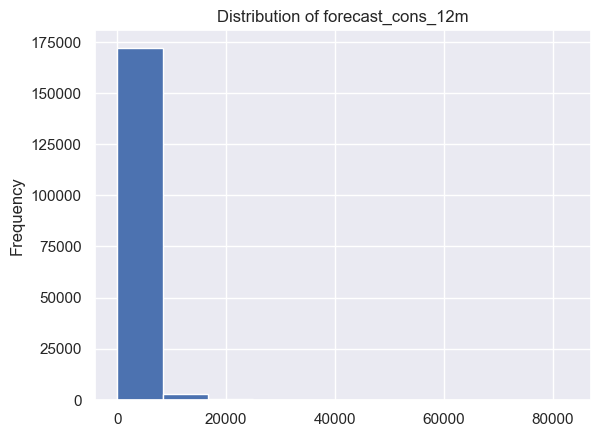

In [78]:
numeric_data["forecast_cons_12m"].plot(kind="hist")
plt.title("Distribution of forecast_cons_12m");
